In [1]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

def pearson_spearman(x, y):
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")

    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")
    
def correlations(pred_df, true_df, group, species_name, model_name):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    # Pearson
    pearson_corr, pearson_p_test = scipy.stats.pearsonr(x, y)
    # Spearman
    spearman_corr, spearman_p_test = scipy.stats.spearmanr(x, y)

    return pd.DataFrame([{
        "group": group,
        "species": species_name,
        "model": model_name,
        "pearson_corr": pearson_corr,
        # "pearson_p": pearson_p_test,
        "spearman_corr": spearman_corr,
        # "spearman_p": spearman_p_test
    }])
    
def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def add_stats(df):
    df['mean'] = df.mean(axis=1)
    df['range'] = df.max(axis=1)-df.min(axis=1)
    df['std'] = df.std(axis=1)

def do_scatter(x, y, xlabel, ylabel, title, combined):
    plt.scatter(x, y, alpha=0.2)
    sc = plt.scatter(x, y, c=combined['std'], cmap='coolwarm', alpha=0.6)  # 'coolwarm' goes from blue to red
    plt.colorbar(sc, label='Standard Deviation')  # adds a color bar legend
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()
    
def bayesian_scatter(combined, xaxis, yaxis):
    x = combined[f'{xaxis}']
    y = combined[f'{yaxis}']
    
    do_scatter(x, y, f'{xaxis}', f'{yaxis}', 'predicted all', combined)
    
    x = combined[combined['label'] == 'val1'][f'{xaxis}']
    y = combined[combined['label'] == 'val1'][f'{yaxis}']
    
    do_scatter(x, y, f'{xaxis}', f'{yaxis}', 'predicted val1', combined[combined['label'] == 'val1'])
    
    x = combined[combined['label'] == 'val2'][f'{xaxis}']
    y = combined[combined['label'] == 'val2'][f'{yaxis}']
    
    do_scatter(x, y, f'{xaxis}', f'{yaxis}', 'predicted val2', combined[combined['label'] == 'val2'])
    
    x = combined[combined['label'] == 'val3'][f'{xaxis}']
    y = combined[combined['label'] == 'val3'][f'{yaxis}']
    
    do_scatter(x, y, f'{xaxis}', f'{yaxis}', 'predicted val3', combined[combined['label'] == 'val3'])

In [37]:
# nonmouse log
def correlate():
    # correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_test2_df, doubled_test2_df, 'test2')
    # correlations(pred_val3_df, doubled_val3_df, 'val3')
    correlations(pred_test3_df, doubled_test3_df, 'test3')

    # print('\n')
    # correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')

LiuAll_results = pd.DataFrame()
species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['cow', 'pig']
# species_list = ['cow']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc', '8i7h7nsh', 'ph4wrpxu']
# model_list = ['bdbi7l3n']
model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc']

for species in species_list:
    # print(f'\n{species}')
    for model in model_list:
        # print(f'\n{model}')
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_LiuAll/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR1: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        print(f'average test1 prediction: {pred_test1_df.mean()}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_LiuAll/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos_LiuAll/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR2: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        res = correlations(pred_test2_df, doubled_test2_df, 'test2', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)

        res = correlations(pred_test3_df, doubled_test3_df, 'test3', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)


# print(all_results)


        # scatter(pred_test2_df, doubled_test2_df, 'True vs predicted for test2', 'True', 'Predicted')
        # scatter(pred_test3_df, doubled_test3_df, 'True vs predicted for test3', 'True', 'Predicted')
        # scatter(pred_pos_df, doubled_pos_df, 'True vs predicted for orthologs', 'True', 'Predicted')


        # histogram(pred_test1_df, 'test1 predictions', 'Predicted signal')
        # histogram(pred_test2_df, 'test2 predictions', 'Predicted signal')
        # histogram(pred_test3_df, 'test3 predictions', 'Predicted signal')
    
        # histogram(pred_neg_df, 'negative test predictions', 'Predicted signal')
        # histogram(pred_pos_df, 'positive test predictions', 'Predicted signal')


average test1 prediction: 0    0.583187
dtype: float64
average test1 prediction: 0    0.574546
dtype: float64
average test1 prediction: 0    0.633169
dtype: float64
average test1 prediction: 0    0.672014
dtype: float64
average test1 prediction: 0    0.705005
dtype: float64
average test1 prediction: 0    0.766207
dtype: float64
average test1 prediction: 0    0.592015
dtype: float64
average test1 prediction: 0    0.576879
dtype: float64
average test1 prediction: 0    0.636212
dtype: float64
average test1 prediction: 0    0.598316
dtype: float64
average test1 prediction: 0    0.587837
dtype: float64
average test1 prediction: 0    0.647011
dtype: float64


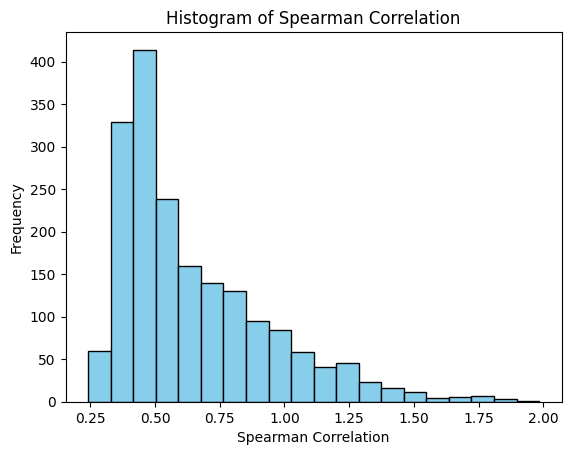

In [61]:
# LiuAll_results
plt.hist(pred_test1_df, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Spearman Correlation")
plt.ylabel("Frequency")
plt.title("Histogram of Spearman Correlation")
plt.show()

In [4]:
remade_test2_results = pd.DataFrame()   
species_list = ['macaque', 'rat', 'cow']
# species_list = ['cow', 'pig']
# species_list = ['macaque']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc', '8i7h7nsh', 'ph4wrpxu']
model_list = ['bdbi7l3n']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc']

for species in species_list:
    # print(f'\n{species}')
    for model in model_list:
        # print(f'\n{model}')
        name = 'amy'
        if species in ['macaque', 'rat']:
            name = 'irene'
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_remade_test2_again/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/{name}_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_remade_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR1: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        print(f'average test1 prediction: {pred_test1_df.mean()}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos_remade/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR2: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        # print(f'average neg test prediction: {pred_neg_df.mean()}')


        res = correlations(pred_test2_df, doubled_test2_df, 'test2', species, model)

        remade_test2_results = pd.concat([remade_test2_results, res], ignore_index=True)

        res = correlations(pred_test3_df, doubled_test3_df, 'test3', species, model)

        remade_test2_results = pd.concat([remade_test2_results, res], ignore_index=True)


# print(all_results)


        # scatter(pred_test2_df, doubled_test2_df, 'True vs predicted for test2', 'True', 'Predicted')
        # scatter(pred_test3_df, doubled_test3_df, 'True vs predicted for test3', 'True', 'Predicted')
        # scatter(pred_pos_df, doubled_pos_df, 'True vs predicted for orthologs', 'True', 'Predicted')


        # histogram(pred_test1_df, 'test1 predictions', 'Predicted signal')
        # histogram(pred_test2_df, 'test2 predictions', 'Predicted signal')
        # histogram(pred_test3_df, 'test3 predictions', 'Predicted signal')
    
        # histogram(pred_neg_df, 'negative test predictions', 'Predicted signal')
        # histogram(pred_pos_df, 'positive test predictions', 'Predicted signal')


average test1 prediction: 0    0.590311
dtype: float64
ERROR2: predictions are a different length than testidation sets
average test1 prediction: 0    0.698309
dtype: float64
ERROR2: predictions are a different length than testidation sets
average test1 prediction: 0    0.592016
dtype: float64
ERROR2: predictions are a different length than testidation sets


In [5]:
remade_test2_results = remade_test2_results.add_suffix("2")
remade_test2_results

# plt.hist(pred_test1_df, bins=20, color="skyblue", edgecolor="black")
# plt.xlabel("Spearman Correlation")
# plt.ylabel("Frequency")
# plt.title("Histogram of Spearman Correlation")
# plt.show()

,group2,species2,model2,pearson_corr2,spearman_corr2
0,test2,macaque,bdbi7l3n,0.335252,0.319773
1,test3,macaque,bdbi7l3n,0.335403,0.359513
2,test2,rat,bdbi7l3n,0.268989,0.260275
3,test3,rat,bdbi7l3n,0.317371,0.308529
4,test2,cow,bdbi7l3n,0.472998,0.477948
5,test3,cow,bdbi7l3n,0.318532,0.321225


In [39]:
remade_test2_results = remade_test2_results.add_suffix("2")
merged = pd.concat([LiuAll_results, remade_test2_results], axis=1)
merged = merged.drop(columns=["group2","species2", "model2"])

cols = list(merged.columns)

# find the positions of the two columns
i = cols.index("spearman_corr")
j = cols.index("pearson_corr2")

# swap them in the list
cols[i], cols[j] = cols[j], cols[i]

# reorder the dataframe
merged_mouseLog = merged[cols]
merged_mouseLog

,group,species,model,pearson_corr,pearson_corr2,spearman_corr,spearman_corr2
0,test2,macaque,bdbi7l3n,0.289472,0.364766,0.273663,0.339076
1,test3,macaque,bdbi7l3n,0.342003,0.335403,0.369013,0.359513
2,test2,macaque,7vsdq5k2,0.282371,0.352349,0.278927,0.331375
3,test3,macaque,7vsdq5k2,0.387633,0.380202,0.411006,0.400160
4,test2,macaque,wnfdrgcc,0.305261,0.374163,0.298562,0.351553
5,test3,macaque,wnfdrgcc,0.411334,0.403444,0.430836,0.421323
6,test2,rat,bdbi7l3n,0.258590,0.269968,0.250351,0.263883
7,test3,rat,bdbi7l3n,0.317371,0.317371,0.308529,0.308529
8,test2,rat,7vsdq5k2,0.219121,0.282648,0.223205,0.277230
9,test3,rat,7vsdq5k2,0.308405,0.308405,0.305852,0.305852


In [9]:
# EXAMPLE MAKE ONE_TO_ONE_PEAKS THEN SAVE IT
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species = 'cow'
cap = species.capitalize()
both_df = pd.read_csv(f"/home/azstephe/liverRegression/regression_liver/data/mouseTo/mouseTo{cap}_liver_{species}Enhancer_mouseEnhancer_wawb.narrowPeak", sep="\t", header=None)
# both_df = pd.read_csv(f"/home/azstephe/liverRegression/regression_liver/data/mapped/{species}ToMouse_liver_{species}Enhancer_mouseEnhancer_wawb.narrowPeak", sep="\t", header=None)
mac_qn = pd.read_csv(f"/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed", sep="\t", header=None)
mouse_qn = pd.read_csv("/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed", sep="\t", header=None)

unique1_2 = both_df[~both_df.duplicated(subset=[1, 2], keep=False)] # entries with unique mac mapped to mouse start and end
all_unique = unique1_2[~unique1_2.duplicated(subset=[11,12], keep=False)]

#### FUNCTIONS

def pearson_spearman(x, y):
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")

    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")
    
def collapse_if_identical(lst):
    return lst[0] if all(x == lst[0] for x in lst) else lst
    

# takes in list and returns peak with largest signal
def keep_largest_signal(lst, qn_df):
    if isinstance(lst, list):
        maxPeakName = ''
        maxPeakStrength = 0
        for peak in lst:
            matching_rows = qn_df[qn_df[3] == peak]
            if not matching_rows.empty:
                signal = matching_rows[4].iloc[0]
                if signal > maxPeakStrength:
                    maxPeakStrength = signal
                    maxPeakName = peak
        return maxPeakName
    else: 
        return lst

# def overlap(start1, end1, start2, end2):
#     return max(0, min(end1, end2)-max(start1, start2))

def get_biggest_overlap(lst, col, df):
    maxOverlap = 0
    maxPeakOverlap = ""
    for peak in lst:
        row = df[df[col] == peak].iloc[0] #iloc bc possible to return multiple rows (never will based on th
        overlap = max(0, min(row[2], row[12])-max(row[1], row[11]))
        if overlap > maxOverlap:
            maxOverlap = overlap
            maxPeakOverlap = peak
    return peak

#### COL1,2 DUPLICATES

duplicates3 = both_df[both_df.duplicated(subset=[1, 2], keep=False)] # entries with duplicated mac mapped to mouse start and end 
grouped_dups3 = duplicates3.groupby([1, 2])[3].apply(list).reset_index(name='col3')

# grouped dups: start | end | [peaks with these endpoints]
grouped_dups3['col3'] = grouped_dups3['col3'].apply(collapse_if_identical) 

grouped_dups3['col3'] = grouped_dups3['col3'].apply(lambda x: keep_largest_signal(x, mac_qn)) # redundant endpoints now map to 1 peak in col3
grouped_dups3 = grouped_dups3[grouped_dups3['col3'] != ''] # remove macaque peaks that aren't large enough

# df of duplicated col1,2 with strongest peak
keep_strongestcol3 = duplicates3.merge(grouped_dups3[['col3']], left_on=3, right_on='col3', how='inner').drop('col3', axis=1) # keeps the strongest signal in col3 for redundant endpoints

#### COL11,12 DUPLICATES

grouped_dups13 = keep_strongestcol3.groupby([11, 12])[13].apply(list).reset_index(name='col13')
grouped_dups13['col13'] = grouped_dups13['col13'].apply(collapse_if_identical)

grouped_dups13['col13'] = grouped_dups13['col13'].apply(lambda x: keep_largest_signal(x, mouse_qn))
grouped_dups13 = grouped_dups13[grouped_dups13['col13'] != '']

keep_strongestcol13 = keep_strongestcol3.merge(grouped_dups13[['col13']], left_on=13, right_on='col13', how='inner').drop('col13', axis=1)

unique_endpoints = keep_strongestcol13 #rows with unique endpoints from the duplicated endpoints set

####

# col3 peakname duplicates with different endpoints
still_dups_col3 = unique_endpoints[unique_endpoints.duplicated(subset=[3], keep=False)]

# col3peaks | [col13 peaks intersecting col3 peak]
grouped_dcol3 = still_dups_col3.groupby(3)[13].apply(list).reset_index(name='col13')

# get the col13 peak with most overlap of col3
grouped_dcol3['col13'] = grouped_dcol3['col13'].apply(lambda x: get_biggest_overlap(x, 13, still_dups_col3))

merged3 = still_dups_col3.merge(grouped_dcol3[[3, 'col13']], left_on=[3, 13], right_on=[3, 'col13'], how='left', indicator=True)

remove3 = merged3[merged3['_merge'] == 'left_only'].drop(columns=['_merge']) # col13 is what we want to remove

unique_endpoints_subset = unique_endpoints.iloc[:,:20]
remove3_subset = remove3.iloc[:,:20]

# all col3 entries unique
unique3 = unique_endpoints[~unique_endpoints_subset.apply(tuple, axis=1).isin(remove3_subset.apply(tuple, axis=1))] 

####

# col13 peakname duplicates with different endpoints
still_dups_col13 = unique3[unique3.duplicated(subset=[13], keep=False)]

# col13peaks | [col3 peaks intersecting col13 peak]
grouped_dcol13 = still_dups_col13.groupby(13)[3].apply(list).reset_index(name='col3')

# get the col3 peak with most overlap of col13
grouped_dcol13['col3'] = grouped_dcol13['col3'].apply(lambda x: get_biggest_overlap(x, 3, still_dups_col13))

merged13 = still_dups_col13.merge(grouped_dcol13[[13, 'col3']], left_on=[3, 13], right_on=['col3', 13], how='left', indicator=True)

remove13 = merged13[merged13['_merge'] == 'left_only'].drop(columns=['_merge'])

unique3_subset = unique3.iloc[:, :20]
remove13_subset = remove13.iloc[:, :20]

# Identify rows in u3 that are NOT in remove3
filtered_peaks_unique = unique3[~unique3_subset.apply(tuple, axis=1).isin(remove13_subset.apply(tuple, axis=1))]

full_unique = pd.concat([all_unique, filtered_peaks_unique])

# Sort by column '1'
one_to_one_peaks = full_unique.sort_values(by=1).reset_index(drop=True)
# one_to_one_peaks.to_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse_remade_test2_again.bed', header=None, sep='\t')
one_to_one_peaks
##############################



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,CM000192.5,1009848,1010207,peak16300,1000,.,23.28335,292.37958,288.95245,194,CM000192.5,1009866,1010336,peak1208,-1,.,-1,-1,-1,381
1,CM000187.6,1149300,1149818,peak11759,1000,.,7.92711,49.69832,47.14115,170,CM000187.6,1149226,1149730,peak12660,-1,.,-1,-1,-1,276
2,CM000179.6,3407782,3408075,peak2611,1000,.,13.27103,58.45907,55.84115,167,CM000179.6,3407607,3408262,peak1575,-1,.,-1,-1,-1,355
3,CM000179.6,3668997,3669494,peak2614,1000,.,32.05998,502.98538,499.07541,338,CM000179.6,3669212,3669664,peak1576,-1,.,-1,-1,-1,149
4,CM000179.6,3836144,3836455,peak2618,1000,.,17.10262,148.99269,145.96640,183,CM000179.6,3836029,3836647,peak1581,-1,.,-1,-1,-1,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,CM000178.7,116327566,116327959,peak2337,1000,.,18.68988,185.16335,182.02147,191,CM000178.7,116327292,116327907,peak855,-1,.,-1,-1,-1,481
206,CM000178.7,117865978,117866290,peak2355,1000,.,25.85551,148.80003,145.77443,147,CM000178.7,117866128,117866363,peak864,-1,.,-1,-1,-1,98
207,CM000179.6,119217478,119218087,peak3684,1000,.,29.29448,214.94119,211.71355,235,CM000179.6,119217613,119217798,peak905,-1,.,-1,-1,-1,119
208,CM000178.7,120585194,120585897,peak2383,1000,.,11.79807,286.95523,283.54129,271,CM000178.7,120585158,120585959,peak878,-1,.,-1,-1,-1,323


In [11]:
foldchange_df = pd.DataFrame()
foldchange_df

""


In [13]:
# species = 'macaque'
# model = 'bdbi7l3n'

species_list = ['macaque', 'rat', 'cow']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc' ]

# species_list = ['macaque']
model_list = ['bdbi7l3n']
for species in species_list:
    for model in model_list:
        name = 'amy'
        if species in ['macaque', 'rat']:
            name = 'irene'

        nonMouse_bed = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', sep="\t", header=None)
        mouse_bed = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed', sep="\t", header=None)
        
        one_to_one_peaks = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse_remade_test2_again.bed', header=None, sep='\t')
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_remade_test2_again/activations_{species}_TEST.csv', header=None)
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/{name}_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_remade_test2/{species}_liver_TEST_500bp.bed', header=None, sep="\t").rename(columns={0: 'mac_chr'})
        val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)
        
        ####################### make the ____ doubled predicted and true df
        peaks = one_to_one_peaks[[4, 14]]
        
        merged_df = peaks.merge(nonMouse_bed, how='left', left_on=4, right_on=3, suffixes=('', '_mac'))
        
        # Merge the result with df3 on col13 and df3['col3']
        merged_df = merged_df.merge(mouse_bed, how='left', left_on=14, right_on=3, suffixes=('_MAC', '_mouse'))
        
        # Subtract col4 values from df2 and df3
        # merged_df['result'] = merged_df['4_mac'] - merged_df['4_mouse']
        # res = merged_df[['4', 14, '4_mac', '4_mouse', 'result']]
        # nan = res[res.isna().any(axis=1)]
        
        # nan
        
        ####################### 
        
        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len].reset_index(drop=True)

        doubled_combined = pd.concat([doubled_val2_df, pred_val2_df], axis=1)
        
        mac_val2_real_pred = doubled_combined.rename(columns={4: 'mac_true', 0:'mac_pred'})
        
        merged_mac_real_pred = peaks.merge(mac_val2_real_pred, how='left', left_on=4, right_on=3).drop(14, axis=1)
        # m_mac_pred = merged_mac_real_pred[~merged_mac_real_pred[3].isin(nan['3_mac'])].reset_index(drop=True)
        m_mac_pred = merged_mac_real_pred.rename(columns={3:'mac_peak'}).drop(4, axis=1)
        
        ####################### make the mouse doubled predicted and true df
        
        mouse_pred = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_mouse_TEST.csv', sep="\t", header=None)
        mouse_real_neg=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', sep="\t", header=None)
        mouse_real_pos=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', sep="\t", header=None)
        
        real_neg_len = 2*len(mouse_real_neg)
        real_pos_len = 2*len(mouse_real_pos)
        
        mouse_pred_pos = mouse_pred.head(real_pos_len).reset_index(drop=True)
        
        doubled_mouse_real_pos = pd.concat([mouse_real_pos, mouse_real_pos]).sort_index(kind='mergesort').reset_index(drop=True)
        
        
        doubled_mouse_real_pos = doubled_mouse_real_pos.rename(columns={0:'mouse_chr'})
        mouse_pos_real_pred = pd.concat([doubled_mouse_real_pos.drop(columns=5), mouse_pred_pos], axis=1)
        mouse_pos_real_pred = mouse_pos_real_pred.rename(columns={4:'mouse_true', 0:'mouse_pred'}).reset_index(drop=True)


        merged_mouse_pred = peaks.merge(mouse_pos_real_pred, how='left', left_on=14, right_on=3)
        
        m_mouse_pred = merged_mouse_pred.rename(columns={3:'mouse_peak'}).drop([14], axis=1)
        
        ####################### make bigboss mouse + query predicted and real info
        
        bigboss = pd.concat([m_mouse_pred, m_mac_pred], axis=1)
        
        bigboss['true'] = bigboss['mouse_true']-bigboss['mac_true']
        bigboss['pred'] = bigboss['mouse_pred']-bigboss['mac_pred']
        
        mouse_av = (bigboss.loc[::2, 'mouse_pred'].values + bigboss.loc[1::2, 'mouse_pred'].values) / 2
        mac_av = (bigboss.loc[::2, 'mac_pred'].values + bigboss.loc[1::2, 'mac_pred'].values) / 2
        
        # Add the averages back to the DataFrame as a new column
        bigboss.loc[::2, 'mouse_pred_avg'] = mouse_av  # Assign averages to even indices only
        bigboss.loc[::2, 'mac_pred_avg'] = mac_av 
        bigboss['avg_pred'] = bigboss['mouse_pred_avg']-bigboss['mac_pred_avg']
        
        same_sign = np.sign(bigboss.loc[::2]['true']) == np.sign(bigboss.loc[::2]['avg_pred'])
        ss_avg = same_sign.sum() / (len(bigboss) / 2)
        print(f'# of same sign for true difference and averaged predicted difference: {same_sign.sum()} / {len(bigboss) / 2} = {same_sign.sum() / (len(bigboss) / 2)}%')
        
        
        same_sign = np.sign(bigboss['true']) == np.sign(bigboss['pred'])
        ss = same_sign.sum() / len(bigboss)
        print(f'# of same sign for true difference and predicted difference: {same_sign.sum()} / {len(bigboss)} = {same_sign.sum() / len(bigboss)} %')
        
        
        x = bigboss['true']
        y = bigboss['pred']
        
        print(pearson_spearman(x, y))
        
        pearson_corr, pearson_p_test = scipy.stats.pearsonr(x, y)
        
        spearman_corr, spearman_p_test = scipy.stats.spearmanr(x, y)
        
        res = pd.DataFrame([{
            "group": 'LiuAll',
            "species": species,
            "model": model,
            "same sign true - pred": ss,
            "same sign true - avg pred": ss_avg,
            "pearson_corr": pearson_corr,
            # "pearson_p": pearson_p_test,
            "spearman_corr": spearman_corr,
            "# same sign": same_sign.sum(),
            "total # peaks": len(bigboss),
            # "spearman_p": spearman_p_test
            }])
        foldchange_df = pd.concat([foldchange_df, res], ignore_index = True)

# of same sign for true difference and averaged predicted difference: 247 / 413.0 = 0.5980629539951574%
# of same sign for true difference and predicted difference: 480 / 826 = 0.5811138014527845 %
Pearson correlation coefficient: 0.2203, p-value: 1.538e-10
Spearman correlation coefficient: 0.1955, p-value: 1.471e-08
None
# of same sign for true difference and averaged predicted difference: 401 / 731.0 = 0.5485636114911081%
# of same sign for true difference and predicted difference: 795 / 1462 = 0.5437756497948016 %
Pearson correlation coefficient: 0.2075, p-value: 1.121e-15
Spearman correlation coefficient: 0.1633, p-value: 3.392e-10
None
# of same sign for true difference and averaged predicted difference: 125 / 210.0 = 0.5952380952380952%
# of same sign for true difference and predicted difference: 258 / 420 = 0.6142857142857143 %
Pearson correlation coefficient: 0.3172, p-value: 2.87e-11
Spearman correlation coefficient: 0.3142, p-value: 4.47e-11
None


In [16]:
foldchange_df

,group,species,model,same sign true - pred,same sign true - avg pred,pearson_corr,spearman_corr,# same sign,total # peaks
0,LiuAll,macaque,bdbi7l3n,0.582707,0.598997,0.210563,0.199251,465,798
1,LiuAll,rat,bdbi7l3n,0.548679,0.553547,0.185183,0.153803,789,1438
2,LiuAll,cow,bdbi7l3n,0.609914,0.586207,0.217736,0.260851,283,464
3,LiuAll,pig,bdbi7l3n,0.523897,0.518382,0.246200,0.190529,285,544
4,remade_test2,macaque,bdbi7l3n,0.605820,0.611111,0.320511,0.286359,458,756
5,remade_test2,rat,bdbi7l3n,0.636496,0.642336,0.352388,0.335792,872,1370
6,remade_test2,cow,bdbi7l3n,0.665385,0.661538,0.354444,0.334727,346,520
7,remade_test2,pig,bdbi7l3n,0.609442,0.613734,0.294164,0.275278,284,466


In [34]:
# EXAMPLE MAKE ONE_TO_ONE_PEAKS THEN SAVE IT
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species = 'pig'
species_cap = species.capitalize()
both_df = pd.read_csv(f"/home/azstephe/liverRegression/regression_liver/data/test_splits/mouse_mapped/mouseTo{species_cap}_liver_{species}Enhancer_mouseEnhancer_wawb.narrowPeak", sep="\t", header=None)
mac_qn = pd.read_csv(f"/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed", sep="\t", header=None)
mouse_qn = pd.read_csv("/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed", sep="\t", header=None)

unique1_2 = both_df[~both_df.duplicated(subset=[1, 2], keep=False)] # entries with unique mac mapped to mouse start and end
all_unique = unique1_2[~unique1_2.duplicated(subset=[11,12], keep=False)]

#### FUNCTIONS

def pearson_spearman(x, y):
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")

    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")
    
def collapse_if_identical(lst):
    return lst[0] if all(x == lst[0] for x in lst) else lst
    

# takes in list and returns peak with largest signal
def keep_largest_signal(lst, qn_df):
    if isinstance(lst, list):
        maxPeakName = ''
        maxPeakStrength = 0
        for peak in lst:
            matching_rows = qn_df[qn_df[3] == peak]
            if not matching_rows.empty:
                signal = matching_rows[4].iloc[0]
                if signal > maxPeakStrength:
                    maxPeakStrength = signal
                    maxPeakName = peak
        return maxPeakName
    else: 
        return lst

# def overlap(start1, end1, start2, end2):
#     return max(0, min(end1, end2)-max(start1, start2))

def get_biggest_overlap(lst, col, df):
    maxOverlap = 0
    maxPeakOverlap = ""
    for peak in lst:
        row = df[df[col] == peak].iloc[0] #iloc bc possible to return multiple rows (never will based on th
        overlap = max(0, min(row[2], row[12])-max(row[1], row[11]))
        if overlap > maxOverlap:
            maxOverlap = overlap
            maxPeakOverlap = peak
    return peak

#### COL1,2 DUPLICATES

duplicates3 = both_df[both_df.duplicated(subset=[1, 2], keep=False)] # entries with duplicated mac mapped to mouse start and end 
grouped_dups3 = duplicates3.groupby([1, 2])[3].apply(list).reset_index(name='col3')

# grouped dups: start | end | [peaks with these endpoints]
grouped_dups3['col3'] = grouped_dups3['col3'].apply(collapse_if_identical) 

grouped_dups3['col3'] = grouped_dups3['col3'].apply(lambda x: keep_largest_signal(x, mac_qn)) # redundant endpoints now map to 1 peak in col3
grouped_dups3 = grouped_dups3[grouped_dups3['col3'] != ''] # remove macaque peaks that aren't large enough

# df of duplicated col1,2 with strongest peak
keep_strongestcol3 = duplicates3.merge(grouped_dups3[['col3']], left_on=3, right_on='col3', how='inner').drop('col3', axis=1) # keeps the strongest signal in col3 for redundant endpoints

#### COL11,12 DUPLICATES

grouped_dups13 = keep_strongestcol3.groupby([11, 12])[13].apply(list).reset_index(name='col13')
grouped_dups13['col13'] = grouped_dups13['col13'].apply(collapse_if_identical)

grouped_dups13['col13'] = grouped_dups13['col13'].apply(lambda x: keep_largest_signal(x, mouse_qn))
grouped_dups13 = grouped_dups13[grouped_dups13['col13'] != '']

keep_strongestcol13 = keep_strongestcol3.merge(grouped_dups13[['col13']], left_on=13, right_on='col13', how='inner').drop('col13', axis=1)

unique_endpoints = keep_strongestcol13 #rows with unique endpoints from the duplicated endpoints set

####

# col3 peakname duplicates with different endpoints
still_dups_col3 = unique_endpoints[unique_endpoints.duplicated(subset=[3], keep=False)]

# col3peaks | [col13 peaks intersecting col3 peak]
grouped_dcol3 = still_dups_col3.groupby(3)[13].apply(list).reset_index(name='col13')

# get the col13 peak with most overlap of col3
grouped_dcol3['col13'] = grouped_dcol3['col13'].apply(lambda x: get_biggest_overlap(x, 13, still_dups_col3))

merged3 = still_dups_col3.merge(grouped_dcol3[[3, 'col13']], left_on=[3, 13], right_on=[3, 'col13'], how='left', indicator=True)

remove3 = merged3[merged3['_merge'] == 'left_only'].drop(columns=['_merge']) # col13 is what we want to remove

unique_endpoints_subset = unique_endpoints.iloc[:,:20]
remove3_subset = remove3.iloc[:,:20]

# all col3 entries unique
unique3 = unique_endpoints[~unique_endpoints_subset.apply(tuple, axis=1).isin(remove3_subset.apply(tuple, axis=1))] 

####

# col13 peakname duplicates with different endpoints
still_dups_col13 = unique3[unique3.duplicated(subset=[13], keep=False)]

# col13peaks | [col3 peaks intersecting col13 peak]
grouped_dcol13 = still_dups_col13.groupby(13)[3].apply(list).reset_index(name='col3')

# get the col3 peak with most overlap of col13
grouped_dcol13['col3'] = grouped_dcol13['col3'].apply(lambda x: get_biggest_overlap(x, 3, still_dups_col13))

merged13 = still_dups_col13.merge(grouped_dcol13[[13, 'col3']], left_on=[3, 13], right_on=['col3', 13], how='left', indicator=True)

remove13 = merged13[merged13['_merge'] == 'left_only'].drop(columns=['_merge'])

unique3_subset = unique3.iloc[:, :20]
remove13_subset = remove13.iloc[:, :20]

# Identify rows in u3 that are NOT in remove3
filtered_peaks_unique = unique3[~unique3_subset.apply(tuple, axis=1).isin(remove13_subset.apply(tuple, axis=1))]

full_unique = pd.concat([all_unique, filtered_peaks_unique])

# Sort by column '1'
one_to_one_peaks = full_unique.sort_values(by=1).reset_index(drop=True)
one_to_one_peaks.to_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse_remade_test2.bed', header=None, sep='\t')
one_to_one_peaks
##############################



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,chr13,4208630,4208992,peak4438,436,.,5.12048,15.30022,13.07386,220,chr13,4208522,4209373,peak11433,-1,.,-1,-1,-1,698
1,chr13,4619480,4619708,peak4450,1000,.,9.70464,35.92663,33.40959,120,chr13,4619454,4619722,peak11454,-1,.,-1,-1,-1,126
2,chr13,6921073,6921426,peak4457,1000,.,14.08124,62.80199,60.07742,243,chr13,6921056,6921378,peak11465,-1,.,-1,-1,-1,221
3,chr10,7513418,7513857,peak2623,1000,.,9.49782,56.50841,53.82513,310,chr10,7513395,7514069,peak1584,-1,.,-1,-1,-1,341
4,chr15,18014111,18014706,peak7572,1000,.,10.21070,83.37821,80.53845,241,chr15,18014049,18014619,peak1399,-1,.,-1,-1,-1,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,chr1,250361191,250361603,peak1995,1000,.,8.95633,73.52613,70.73846,220,chr1,250360935,250361741,peak13164,-1,.,-1,-1,-1,411
229,chr1,250362113,250362385,peak1996,1000,.,20.87713,271.56668,268.13535,139,chr1,250362100,250362329,peak13163,-1,.,-1,-1,-1,123
230,chr1,252337043,252337387,peak2022,1000,.,9.95702,89.91719,87.04536,187,chr1,252337050,252337520,peak13152,-1,.,-1,-1,-1,199
231,chr1,259863731,259864508,peak2101,954,.,8.24742,34.61001,32.10675,642,chr1,259864254,259864466,peak13135,-1,.,-1,-1,-1,109


In [19]:
species = 'pig'
model = 'bdbi7l3n'

species_list = ['macaque', 'rat', 'cow', 'pig']
model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc']

for species in species_list:
    for model in model_list:
        
        name = 'amy'
        if species in ['macaque', 'rat']:
            name = 'irene'
        
        nonMouse_bed = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', sep="\t", header=None)
        mouse_bed = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed', sep="\t", header=None)
        
        one_to_one_peaks = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse_remade_test2.bed', header=None, sep='\t')
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_remade_test2/activations_{species}_TEST.csv', header=None)
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/{name}_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, sep="\t").rename(columns={0: 'mac_chr'})
        val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)
        
        ####################### make the ____ doubled predicted and true df
        peaks = one_to_one_peaks[[4, 14]]
        
        merged_df = peaks.merge(nonMouse_bed, how='left', left_on=4, right_on=3, suffixes=('', '_mac'))
        
        # Merge the result with df3 on col13 and df3['col3']
        merged_df = merged_df.merge(mouse_bed, how='left', left_on=14, right_on=3, suffixes=('_MAC', '_mouse'))
        

        ####################### 
        
        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len].reset_index(drop=True)
        
        doubled_combined = pd.concat([doubled_val2_df, pred_val2_df], axis=1)
        
        mac_val2_real_pred = doubled_combined.rename(columns={4: 'mac_true', 0:'mac_pred'})
        
        merged_mac_real_pred = peaks.merge(mac_val2_real_pred, how='left', left_on=4, right_on=3).drop(14, axis=1)
        # m_mac_pred = merged_mac_real_pred[~merged_mac_real_pred[3].isin(nan['3_mac'])].reset_index(drop=True)
        m_mac_pred = merged_mac_real_pred.rename(columns={3:'mac_peak'}).drop(4, axis=1)
        
        ####################### make the mouse doubled predicted and true df
        
        mouse_pred = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_mouse_TEST.csv', sep="\t", header=None)
        mouse_real_neg=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', sep="\t", header=None)
        mouse_real_pos=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', sep="\t", header=None)
        
        real_neg_len = 2*len(mouse_real_neg)
        real_pos_len = 2*len(mouse_real_pos)
        
        mouse_pred_pos = mouse_pred.head(real_pos_len).reset_index(drop=True)
        
        doubled_mouse_real_pos = pd.concat([mouse_real_pos, mouse_real_pos]).sort_index(kind='mergesort').reset_index(drop=True)
        
        
        doubled_mouse_real_pos = doubled_mouse_real_pos.rename(columns={0:'mouse_chr'})
        mouse_pos_real_pred = pd.concat([doubled_mouse_real_pos.drop(columns=5), mouse_pred_pos], axis=1)
        mouse_pos_real_pred = mouse_pos_real_pred.rename(columns={4:'mouse_true', 0:'mouse_pred'}).reset_index(drop=True)
        
        
        merged_mouse_pred = peaks.merge(mouse_pos_real_pred, how='left', left_on=14, right_on=3)

        m_mouse_pred = merged_mouse_pred.rename(columns={3:'mouse_peak'}).drop([14], axis=1)
        
        ####################### make bigboss mouse + query predicted and real info
        
        bigboss = pd.concat([m_mouse_pred, m_mac_pred], axis=1)
        
        bigboss['true'] = bigboss['mouse_true']-bigboss['mac_true']
        bigboss['pred'] = bigboss['mouse_pred']-bigboss['mac_pred']
        
        mouse_av = (bigboss.loc[::2, 'mouse_pred'].values + bigboss.loc[1::2, 'mouse_pred'].values) / 2
        mac_av = (bigboss.loc[::2, 'mac_pred'].values + bigboss.loc[1::2, 'mac_pred'].values) / 2
        
        # Add the averages back to the DataFrame as a new column
        bigboss.loc[::2, 'mouse_pred_avg'] = mouse_av  # Assign averages to even indices only
        bigboss.loc[::2, 'mac_pred_avg'] = mac_av 
        bigboss['avg_pred'] = bigboss['mouse_pred_avg']-bigboss['mac_pred_avg']
        
        same_sign = np.sign(bigboss.loc[::2]['true']) == np.sign(bigboss.loc[::2]['avg_pred'])
        ss_avg = same_sign.sum() / (len(bigboss) / 2)
        print(f'# of same sign for true difference and averaged predicted difference: {same_sign.sum()} / {len(bigboss) / 2} = {same_sign.sum() / (len(bigboss) / 2)}%')
                
        same_sign = np.sign(bigboss['true']) == np.sign(bigboss['pred'])
        ss = same_sign.sum() / len(bigboss)
        print(f'# of same sign for true difference and predicted difference: {same_sign.sum()} / {len(bigboss)} = {same_sign.sum() / len(bigboss)} %')
        

        x = bigboss['true']
        y = bigboss['pred']
        
        print(pearson_spearman(x, y))
        
        pearson_corr, pearson_p_test = scipy.stats.pearsonr(x, y)
        
        spearman_corr, spearman_p_test = scipy.stats.spearmanr(x, y)

        res = pd.DataFrame([{
            "group": 'remade_test2',
            "species": species,
            "model": model,
            "same sign true - pred": ss,
            "same sign true - avg pred": ss_avg,
            "pearson_corr": pearson_corr,
            # "pearson_p": pearson_p_test,
            "spearman_corr": spearman_corr,
            "# same sign": same_sign.sum(),
            "total # peaks": len(bigboss),
            # "spearman_p": spearman_p_test
            }])
        foldchange_df = pd.concat([foldchange_df, res], ignore_index = True)

# of same sign for true difference and averaged predicted difference: 231 / 378.0 = 0.6111111111111112%
# of same sign for true difference and predicted difference: 458 / 756 = 0.6058201058201058 %
Pearson correlation coefficient: 0.3205, p-value: 1.603e-19
Spearman correlation coefficient: 0.2864, p-value: 9.805e-16
None
# of same sign for true difference and averaged predicted difference: 233 / 378.0 = 0.6164021164021164%
# of same sign for true difference and predicted difference: 464 / 756 = 0.6137566137566137 %
Pearson correlation coefficient: 0.3206, p-value: 1.563e-19
Spearman correlation coefficient: 0.3001, p-value: 3.354e-17
None
# of same sign for true difference and averaged predicted difference: 232 / 378.0 = 0.6137566137566137%
# of same sign for true difference and predicted difference: 469 / 756 = 0.6203703703703703 %
Pearson correlation coefficient: 0.3295, p-value: 1.312e-20
Spearman correlation coefficient: 0.2983, p-value: 5.264e-17
None
# of same sign for true diff

In [20]:
# foldchange_df.loc[4:7, "group"] = "remade_test2"
foldchange_df

,group,species,model,same sign true - pred,same sign true - avg pred,pearson_corr,spearman_corr,# same sign,total # peaks
0,LiuAll,macaque,bdbi7l3n,0.582707,0.598997,0.210563,0.199251,465,798
1,LiuAll,macaque,7vsdq5k2,0.560150,0.568922,0.190578,0.162377,447,798
2,LiuAll,macaque,wnfdrgcc,0.577694,0.566416,0.198665,0.180306,461,798
3,LiuAll,rat,bdbi7l3n,0.548679,0.553547,0.185183,0.153803,789,1438
4,LiuAll,rat,7vsdq5k2,0.564673,0.563282,0.160826,0.146438,812,1438
5,LiuAll,rat,wnfdrgcc,0.552156,0.556328,0.158845,0.140044,794,1438
6,LiuAll,cow,bdbi7l3n,0.609914,0.586207,0.217736,0.260851,283,464
7,LiuAll,cow,7vsdq5k2,0.534483,0.530172,0.187444,0.183402,248,464
8,LiuAll,cow,wnfdrgcc,0.545259,0.568966,0.221862,0.223205,253,464
9,LiuAll,pig,bdbi7l3n,0.523897,0.518382,0.246200,0.190529,285,544


In [32]:
# nonmouse log
def correlate():
    # correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_test2_df, doubled_test2_df, 'test2')
    # correlations(pred_val3_df, doubled_val3_df, 'val3')
    correlations(pred_test3_df, doubled_test3_df, 'test3')

    # print('\n')
    # correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')

LiuAll_results = pd.DataFrame()
species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['cow', 'pig']
# species_list = ['macaque']
model_list = ['cq45eb2s']

for species in species_list:
    # print(f'\n{species}')
    for model in model_list:
        # print(f'\n{model}')
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_LiuAll/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR1: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        print(f'average test1 prediction: {pred_test1_df.mean()}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_LiuAll/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos_LiuAll/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR2: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        res = correlations(pred_test2_df, doubled_test2_df, 'test2', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)

        res = correlations(pred_test3_df, doubled_test3_df, 'test3', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)


# print(all_results)


        # scatter(pred_test2_df, doubled_test2_df, 'True vs predicted for test2', 'True', 'Predicted')
        # scatter(pred_test3_df, doubled_test3_df, 'True vs predicted for test3', 'True', 'Predicted')
        # scatter(pred_pos_df, doubled_pos_df, 'True vs predicted for orthologs', 'True', 'Predicted')


        # histogram(pred_test1_df, 'test1 predictions', 'Predicted signal')
        # histogram(pred_test2_df, 'test2 predictions', 'Predicted signal')
        # histogram(pred_test3_df, 'test3 predictions', 'Predicted signal')
    
        # histogram(pred_neg_df, 'negative test predictions', 'Predicted signal')
        # histogram(pred_pos_df, 'positive test predictions', 'Predicted signal')


average test1 prediction: 0    0.340474
dtype: float64
average test1 prediction: 0    0.543557
dtype: float64
average test1 prediction: 0    0.352554
dtype: float64
average test1 prediction: 0    0.349621
dtype: float64


In [33]:
LiuAll_results

,group,species,model,pearson_corr,spearman_corr
0,test2,macaque,cq45eb2s,0.440814,0.404563
1,test3,macaque,cq45eb2s,0.545842,0.544125
2,test2,rat,cq45eb2s,0.367007,0.361281
3,test3,rat,cq45eb2s,0.403387,0.398167
4,test2,cow,cq45eb2s,0.460367,0.489625
5,test3,cow,cq45eb2s,0.421533,0.417875
6,test2,pig,cq45eb2s,0.404294,0.371633
7,test3,pig,cq45eb2s,0.436736,0.428436


In [34]:
remade_test2_results = pd.DataFrame()   
species_list = ['macaque', 'rat', 'cow', 'pig']
model_list = ['cq45eb2s']

for species in species_list:
    # print(f'\n{species}')
    for model in model_list:
        # print(f'\n{model}')
        name = 'amy'
        if species in ['macaque', 'rat']:
            name = 'irene'
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_remade_test2/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/{name}_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR1: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        print(f'average test1 prediction: {pred_test1_df.mean()}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR2: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        # print(f'average neg test prediction: {pred_neg_df.mean()}')

        neg = 'nonMacaque_liver_andRat_andCow_andPig_VAL_500bp.bed'
        if species == 'rat':
            neg = 'nonRat_liver_andMacaque_andCow_andPig_VAL_500bp.bed'
        elif species == 'cow':
            neg = 'nonCow_liver_andMacaque_andRat_andPig_VAL_500bp.bed'
        elif species == 'pig':
            neg = 'nonPig_liver_andMacaque_andRat_andCow_VAL_500bp.bed'
        
        # load all the DFs
        # pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
        
        # val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        # val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        # val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        # val1_len = 2*len(val1_df)
        # val2_len = 2*len(val2_df)
        # val3_len = 2*len(val3_df)
        
        # # input sanity check
        # if len(pred_df) != val1_len+val2_len+val3_len:
        #     print("ERROR: predictions are a different length than validation sets")
        
        # doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        # doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        # doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        # pred_val1_df = pred_df.head(val1_len)
        # pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
        # pred_val3_df = pred_df.tail(val3_len)
        
        # doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

        # print(f'average val1 prediction: {pred_val1_df.mean()}')
        
        # correlate()

        res = correlations(pred_test2_df, doubled_test2_df, 'test2', species, model)

        remade_test2_results = pd.concat([remade_test2_results, res], ignore_index=True)

        res = correlations(pred_test3_df, doubled_test3_df, 'test3', species, model)

        remade_test2_results = pd.concat([remade_test2_results, res], ignore_index=True)
remade_test2_results

average test1 prediction: 0    0.388092
dtype: float64
average test1 prediction: 0    0.63422
dtype: float64
average test1 prediction: 0    0.352554
dtype: float64
average test1 prediction: 0    0.349621
dtype: float64


,group,species,model,pearson_corr,spearman_corr
0,test2,macaque,cq45eb2s,0.553981,0.509102
1,test3,macaque,cq45eb2s,0.530429,0.527048
2,test2,rat,cq45eb2s,0.376526,0.389685
3,test3,rat,cq45eb2s,0.403387,0.398167
4,test2,cow,cq45eb2s,0.528086,0.530799
5,test3,cow,cq45eb2s,0.424156,0.416502
6,test2,pig,cq45eb2s,0.493303,0.453326
7,test3,pig,cq45eb2s,0.436736,0.428436


In [35]:
remade_test2_results = remade_test2_results.add_suffix("2")
merged = pd.concat([LiuAll_results, remade_test2_results], axis=1)
merged = merged.drop(columns=["group2","species2", "model2"])

cols = list(merged.columns)

# find the positions of the two columns
i = cols.index("spearman_corr")
j = cols.index("pearson_corr2")

# swap them in the list
cols[i], cols[j] = cols[j], cols[i]

# reorder the dataframe
merged = merged[cols]
merged

,group,species,model,pearson_corr,pearson_corr2,spearman_corr,spearman_corr2
0,test2,macaque,cq45eb2s,0.440814,0.553981,0.404563,0.509102
1,test3,macaque,cq45eb2s,0.545842,0.530429,0.544125,0.527048
2,test2,rat,cq45eb2s,0.367007,0.376526,0.361281,0.389685
3,test3,rat,cq45eb2s,0.403387,0.403387,0.398167,0.398167
4,test2,cow,cq45eb2s,0.460367,0.528086,0.489625,0.530799
5,test3,cow,cq45eb2s,0.421533,0.424156,0.417875,0.416502
6,test2,pig,cq45eb2s,0.404294,0.493303,0.371633,0.453326
7,test3,pig,cq45eb2s,0.436736,0.436736,0.428436,0.428436


In [40]:
merged_mouseLog

,group,species,model,pearson_corr,pearson_corr2,spearman_corr,spearman_corr2
0,test2,macaque,bdbi7l3n,0.289472,0.364766,0.273663,0.339076
1,test3,macaque,bdbi7l3n,0.342003,0.335403,0.369013,0.359513
2,test2,macaque,7vsdq5k2,0.282371,0.352349,0.278927,0.331375
3,test3,macaque,7vsdq5k2,0.387633,0.380202,0.411006,0.400160
4,test2,macaque,wnfdrgcc,0.305261,0.374163,0.298562,0.351553
5,test3,macaque,wnfdrgcc,0.411334,0.403444,0.430836,0.421323
6,test2,rat,bdbi7l3n,0.258590,0.269968,0.250351,0.263883
7,test3,rat,bdbi7l3n,0.317371,0.317371,0.308529,0.308529
8,test2,rat,7vsdq5k2,0.219121,0.282648,0.223205,0.277230
9,test3,rat,7vsdq5k2,0.308405,0.308405,0.305852,0.305852


In [9]:
bigboss

,4,mouse_chr,1,2,mouse_peak,mouse_true,mouse_pred,mac_chr,1,2,mac_peak,mac_true,mac_pred,true,pred,mouse_pred_avg,mac_pred_avg,avg_pred
0,peak55147,chr2,27626559,27627059,peak11701,1.868742,1.305829,chr15,4084426,4084926,peak55147,1.740601,0.756262,0.128141,0.549567,1.324922,0.770068,0.554854
1,peak55147,chr2,27626559,27627059,peak11701,1.868742,1.344015,chr15,4084426,4084926,peak55147,1.740601,0.783874,0.128141,0.560141,NaN,NaN,NaN
2,peak5037,chr2,27624888,27625388,peak11700,1.693926,1.201652,chr15,4089579,4090079,peak5037,2.814829,1.016151,-1.120903,0.185501,1.216424,0.926522,0.289902
3,peak5037,chr2,27624888,27625388,peak11700,1.693926,1.231196,chr15,4089579,4090079,peak5037,2.814829,0.836894,-1.120903,0.394302,NaN,NaN,NaN
4,peak64799,chr2,27596872,27597372,peak11696,1.781288,0.608027,chr15,4125210,4125710,peak64799,1.251777,0.851273,0.529511,-0.243246,0.599033,0.889278,-0.290246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,peak67300,chr1,177684857,177685357,peak1706,2.481591,1.044113,chr1,220758113,220758613,peak67300,1.530440,1.472277,0.951151,-0.428164,NaN,NaN,NaN
822,peak25128,chr1,177702799,177703299,peak1710,2.472075,1.380222,chr1,220786115,220786615,peak25128,2.504141,1.290632,-0.032067,0.089590,1.391217,1.300788,0.090429
823,peak25128,chr1,177702799,177703299,peak1710,2.472075,1.402212,chr1,220786115,220786615,peak25128,2.504141,1.310945,-0.032067,0.091268,NaN,NaN,NaN
824,peak23476,chr1,178600782,178601282,peak1720,2.221398,1.020716,chr1,221777859,221778359,peak23476,2.489575,1.055485,-0.268177,-0.034768,0.979852,0.966865,0.012987


In [2]:
# nonmouse log
LiuAll_results = pd.DataFrame()
# species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['cow', 'pig']
species_list = ['cow']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc', '8i7h7nsh', 'ph4wrpxu']
model_list = ['bdbi7l3n']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc']

for species in species_list:
    # print(f'\n{species}')
    for model in model_list:
        # print(f'\n{model}')
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_remade_test2_again/activations_{species}_TRAINING_pos.csv', header=None)
        
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_remade_test2/{species}_liver_TRAINING_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test2_len = 2*len(test2_df)
        
        # input sanity check
        if len(pred_df) != test2_len:
            print("ERROR1: predictions are a different length than testidation sets")
        
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)

        res = correlations(pred_df, doubled_test2_df, 'train2 amy', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)

        

        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_remade_test2_again/activations_{species}_VAL_pos.csv', header=None)
        
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_remade_test2/{species}_liver_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test2_len = 2*len(test2_df)
        
        # input sanity check
        if len(pred_df) != test2_len:
            print("ERROR1: predictions are a different length than testidation sets")
        
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)

        res = correlations(pred_df, doubled_test2_df, 'val2 amy', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)


        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_remade_test2_again/activations_{species}_TRAINING_irene.csv', header=None)
        
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/cow_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        test2_len = 2*len(test2_df)
        
        # input sanity check
        if len(pred_df) != test2_len:
            print("ERROR1: predictions are a different length than testidation sets")
        
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)

        res = correlations(pred_df, doubled_test2_df, 'train2 irene', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)

LiuAll_results


# print(all_results)


        # scatter(pred_test2_df, doubled_test2_df, 'True vs predicted for test2', 'True', 'Predicted')
        # scatter(pred_test3_df, doubled_test3_df, 'True vs predicted for test3', 'True', 'Predicted')
        # scatter(pred_pos_df, doubled_pos_df, 'True vs predicted for orthologs', 'True', 'Predicted')


        # histogram(pred_test1_df, 'test1 predictions', 'Predicted signal')
        # histogram(pred_test2_df, 'test2 predictions', 'Predicted signal')
        # histogram(pred_test3_df, 'test3 predictions', 'Predicted signal')
    
        # histogram(pred_neg_df, 'negative test predictions', 'Predicted signal')
        # histogram(pred_pos_df, 'positive test predictions', 'Predicted signal')


,group,species,model,pearson_corr,spearman_corr
0,train2 amy,cow,bdbi7l3n,0.433235,0.431973
1,val2 amy,cow,bdbi7l3n,0.477606,0.473240
2,train2 irene,cow,bdbi7l3n,0.405617,0.401242


In [4]:
# /home/azstephe/liverRegression/regression_liver/data/mouseTo/mouseToCow_liver_cowEnhancer_mouseEnhancer_wawb_TRAINING.narrowPeak

# EXAMPLE MAKE ONE_TO_ONE_PEAKS THEN SAVE IT
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species = 'cow'
cap = species.capitalize()
both_df = pd.read_csv(f"/home/azstephe/liverRegression/regression_liver/data/mouseTo/mouseToCow_liver_cowEnhancer_mouseEnhancer_wawb_TRAINING.narrowPeak", sep="\t", header=None)
# both_df = pd.read_csv(f"/home/azstephe/liverRegression/regression_liver/data/mapped/{species}ToMouse_liver_{species}Enhancer_mouseEnhancer_wawb.narrowPeak", sep="\t", header=None)
mac_qn = pd.read_csv(f"/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed", sep="\t", header=None)
mouse_qn = pd.read_csv("/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed", sep="\t", header=None)

unique1_2 = both_df[~both_df.duplicated(subset=[1, 2], keep=False)] # entries with unique mac mapped to mouse start and end
all_unique = unique1_2[~unique1_2.duplicated(subset=[11,12], keep=False)]

#### FUNCTIONS

def pearson_spearman(x, y):
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")

    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")
    
def collapse_if_identical(lst):
    return lst[0] if all(x == lst[0] for x in lst) else lst
    

# takes in list and returns peak with largest signal
def keep_largest_signal(lst, qn_df):
    if isinstance(lst, list):
        maxPeakName = ''
        maxPeakStrength = 0
        for peak in lst:
            matching_rows = qn_df[qn_df[3] == peak]
            if not matching_rows.empty:
                signal = matching_rows[4].iloc[0]
                if signal > maxPeakStrength:
                    maxPeakStrength = signal
                    maxPeakName = peak
        return maxPeakName
    else: 
        return lst

# def overlap(start1, end1, start2, end2):
#     return max(0, min(end1, end2)-max(start1, start2))

def get_biggest_overlap(lst, col, df):
    maxOverlap = 0
    maxPeakOverlap = ""
    for peak in lst:
        row = df[df[col] == peak].iloc[0] #iloc bc possible to return multiple rows (never will based on th
        overlap = max(0, min(row[2], row[12])-max(row[1], row[11]))
        if overlap > maxOverlap:
            maxOverlap = overlap
            maxPeakOverlap = peak
    return peak

#### COL1,2 DUPLICATES

duplicates3 = both_df[both_df.duplicated(subset=[1, 2], keep=False)] # entries with duplicated mac mapped to mouse start and end 
grouped_dups3 = duplicates3.groupby([1, 2])[3].apply(list).reset_index(name='col3')

# grouped dups: start | end | [peaks with these endpoints]
grouped_dups3['col3'] = grouped_dups3['col3'].apply(collapse_if_identical) 

grouped_dups3['col3'] = grouped_dups3['col3'].apply(lambda x: keep_largest_signal(x, mac_qn)) # redundant endpoints now map to 1 peak in col3
grouped_dups3 = grouped_dups3[grouped_dups3['col3'] != ''] # remove macaque peaks that aren't large enough

# df of duplicated col1,2 with strongest peak
keep_strongestcol3 = duplicates3.merge(grouped_dups3[['col3']], left_on=3, right_on='col3', how='inner').drop('col3', axis=1) # keeps the strongest signal in col3 for redundant endpoints

#### COL11,12 DUPLICATES

grouped_dups13 = keep_strongestcol3.groupby([11, 12])[13].apply(list).reset_index(name='col13')
grouped_dups13['col13'] = grouped_dups13['col13'].apply(collapse_if_identical)

grouped_dups13['col13'] = grouped_dups13['col13'].apply(lambda x: keep_largest_signal(x, mouse_qn))
grouped_dups13 = grouped_dups13[grouped_dups13['col13'] != '']

keep_strongestcol13 = keep_strongestcol3.merge(grouped_dups13[['col13']], left_on=13, right_on='col13', how='inner').drop('col13', axis=1)

unique_endpoints = keep_strongestcol13 #rows with unique endpoints from the duplicated endpoints set

####

# col3 peakname duplicates with different endpoints
still_dups_col3 = unique_endpoints[unique_endpoints.duplicated(subset=[3], keep=False)]

# col3peaks | [col13 peaks intersecting col3 peak]
grouped_dcol3 = still_dups_col3.groupby(3)[13].apply(list).reset_index(name='col13')

# get the col13 peak with most overlap of col3
grouped_dcol3['col13'] = grouped_dcol3['col13'].apply(lambda x: get_biggest_overlap(x, 13, still_dups_col3))

merged3 = still_dups_col3.merge(grouped_dcol3[[3, 'col13']], left_on=[3, 13], right_on=[3, 'col13'], how='left', indicator=True)

remove3 = merged3[merged3['_merge'] == 'left_only'].drop(columns=['_merge']) # col13 is what we want to remove

unique_endpoints_subset = unique_endpoints.iloc[:,:20]
remove3_subset = remove3.iloc[:,:20]

# all col3 entries unique
unique3 = unique_endpoints[~unique_endpoints_subset.apply(tuple, axis=1).isin(remove3_subset.apply(tuple, axis=1))] 

####

# col13 peakname duplicates with different endpoints
still_dups_col13 = unique3[unique3.duplicated(subset=[13], keep=False)]

# col13peaks | [col3 peaks intersecting col13 peak]
grouped_dcol13 = still_dups_col13.groupby(13)[3].apply(list).reset_index(name='col3')

# get the col3 peak with most overlap of col13
grouped_dcol13['col3'] = grouped_dcol13['col3'].apply(lambda x: get_biggest_overlap(x, 3, still_dups_col13))

merged13 = still_dups_col13.merge(grouped_dcol13[[13, 'col3']], left_on=[3, 13], right_on=['col3', 13], how='left', indicator=True)

remove13 = merged13[merged13['_merge'] == 'left_only'].drop(columns=['_merge'])

unique3_subset = unique3.iloc[:, :20]
remove13_subset = remove13.iloc[:, :20]

# Identify rows in u3 that are NOT in remove3
filtered_peaks_unique = unique3[~unique3_subset.apply(tuple, axis=1).isin(remove13_subset.apply(tuple, axis=1))]

full_unique = pd.concat([all_unique, filtered_peaks_unique])

# Sort by column '1'
one_to_one_peaks = full_unique.sort_values(by=1).reset_index(drop=True)
# one_to_one_peaks.to_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse_TRAINING.bed', header=None, sep='\t')
one_to_one_peaks
##############################



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,CM000196.6,649366,649709,peak18896,1000,.,8.86772,73.02018,70.31522,160,CM000196.6,649222,649861,peak3861,-1,.,-1,-1,-1,286
1,CM000196.6,697302,697595,peak18897,855,.,12.21080,71.96001,69.26091,159,CM000196.6,697280,697531,peak3860,-1,.,-1,-1,-1,156
2,CM000186.6,700048,700340,peak10763,1000,.,14.79414,88.97805,86.19107,146,CM000186.6,700001,700491,peak10692,-1,.,-1,-1,-1,199
3,CM000198.6,1045050,1045480,peak20200,1000,.,13.74829,155.11526,152.06822,155,CM000198.6,1044995,1045443,peak3645,-1,.,-1,-1,-1,216
4,CM000181.7,1048685,1049109,peak4981,1000,.,24.52830,151.86433,148.82822,300,CM000181.7,1048657,1049144,peak3318,-1,.,-1,-1,-1,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,CM000177.6,150430862,150431083,peak1329,1000,.,9.55138,44.33774,41.82077,109,CM000177.6,150430865,150431108,peak9393,-1,.,-1,-1,-1,132
1275,CM000177.6,153380390,153381065,peak1368,1000,.,24.11705,243.06152,239.75816,211,CM000177.6,153380496,153380639,peak9411,-1,.,-1,-1,-1,93
1276,CM000177.6,153536586,153537239,peak1373,1000,.,12.51557,146.96411,143.94484,363,CM000177.6,153536800,153537208,peak9418,-1,.,-1,-1,-1,118
1277,CM000177.6,153542221,153542729,peak1374,830,.,5.07215,44.51649,41.99826,111,CM000177.6,153542350,153542625,peak9419,-1,.,-1,-1,-1,169


In [2]:
# species_list = ['macaque', 'rat', 'cow', 'pig']
model_list = ['bdbi7l3n']
species_list = ['cow']

for species in species_list:
    for model in model_list:
        
        nonMouse_bed = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', sep="\t", header=None)
        mouse_bed = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed', sep="\t", header=None)
        
        
        one_to_one_peaks = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse_TRAINING.bed', header=None, sep='\t')
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_remade_test2_again/activations_{species}_TRAINING_pos.csv', header=None)
        # val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/{name}_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_remade_test2/cow_liver_TRAINING_500bp.bed', header=None, sep="\t").rename(columns={0: 'mac_chr'})
        # val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        # val1_len = 2*len(val1_df)
        # val2_len = 2*len(val2_df)
        
        ####################### make the ____ doubled predicted and true df
        peaks = one_to_one_peaks[[4, 14]]
        
        merged_df = peaks.merge(nonMouse_bed, how='left', left_on=4, right_on=3, suffixes=('', '_mac'))
        
        # Merge the result with df3 on col13 and df3['col3']
        merged_df = merged_df.merge(mouse_bed, how='left', left_on=14, right_on=3, suffixes=('_MAC', '_mouse'))
        

        ####################### 
        
        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_val2_df = pred_df
        
        doubled_combined = pd.concat([doubled_val2_df, pred_val2_df], axis=1)
        
        mac_val2_real_pred = doubled_combined.rename(columns={4: 'mac_true', 0:'mac_pred'})
        
        merged_mac_real_pred = peaks.merge(mac_val2_real_pred, how='left', left_on=4, right_on=3).drop(14, axis=1)
        # m_mac_pred = merged_mac_real_pred[~merged_mac_real_pred[3].isin(nan['3_mac'])].reset_index(drop=True)
        m_mac_pred = merged_mac_real_pred.rename(columns={3:'mac_peak'}).drop(4, axis=1)
        
        ####################### make the mouse doubled predicted and true df
        
        mouse_pred = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/bdbi7l3n/activations_mouse_VAL_TRAIN.csv', sep="\t", header=None)
        # mouse_real_neg=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', sep="\t", header=None)
        mouse_real_pos=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/logPos/mouse_liver_TRAINONLY.narrowPeak', sep="\t", header=None)
        
        # real_neg_len = 2*len(mouse_real_neg)
        real_pos_len = 2*len(mouse_real_pos)
        
        mouse_pred_pos = mouse_pred.tail(real_pos_len).reset_index(drop=True)
        
        doubled_mouse_real_pos = pd.concat([mouse_real_pos, mouse_real_pos]).sort_index(kind='mergesort').reset_index(drop=True)
        
        
        doubled_mouse_real_pos = doubled_mouse_real_pos.rename(columns={0:'mouse_chr'})
        mouse_pos_real_pred = pd.concat([doubled_mouse_real_pos.drop(columns=5), mouse_pred_pos], axis=1)
        mouse_pos_real_pred = mouse_pos_real_pred.rename(columns={4:'mouse_true', 0:'mouse_pred'}).reset_index(drop=True)
        
        
        merged_mouse_pred = peaks.merge(mouse_pos_real_pred, how='left', left_on=14, right_on=3)

        m_mouse_pred = merged_mouse_pred.rename(columns={3:'mouse_peak'}).drop([14], axis=1)
        
        ####################### make bigboss mouse + query predicted and real info
        
        bigboss = pd.concat([m_mouse_pred, m_mac_pred], axis=1)
        
        bigboss['true'] = bigboss['mouse_true']-bigboss['mac_true']
        bigboss['pred'] = bigboss['mouse_pred']-bigboss['mac_pred']
        
        mouse_av = (bigboss.loc[::2, 'mouse_pred'].values + bigboss.loc[1::2, 'mouse_pred'].values) / 2
        mac_av = (bigboss.loc[::2, 'mac_pred'].values + bigboss.loc[1::2, 'mac_pred'].values) / 2
        
        # Add the averages back to the DataFrame as a new column
        bigboss.loc[::2, 'mouse_pred_avg'] = mouse_av  # Assign averages to even indices only
        bigboss.loc[::2, 'mac_pred_avg'] = mac_av 
        bigboss['avg_pred'] = bigboss['mouse_pred_avg']-bigboss['mac_pred_avg']
        
        same_sign = np.sign(bigboss.loc[::2]['true']) == np.sign(bigboss.loc[::2]['avg_pred'])
        ss_avg = same_sign.sum() / (len(bigboss) / 2)
        print(f'# of same sign for true difference and averaged predicted difference: {same_sign.sum()} / {len(bigboss) / 2} = {same_sign.sum() / (len(bigboss) / 2)}%')
                
        same_sign = np.sign(bigboss['true']) == np.sign(bigboss['pred'])
        ss = same_sign.sum() / len(bigboss)
        print(f'# of same sign for true difference and predicted difference: {same_sign.sum()} / {len(bigboss)} = {same_sign.sum() / len(bigboss)} %')
        

        x = bigboss['true']
        y = bigboss['pred']
        
        print(pearson_spearman(x, y))
        
        pearson_corr, pearson_p_test = scipy.stats.pearsonr(x, y)
        
        spearman_corr, spearman_p_test = scipy.stats.spearmanr(x, y)

        res = pd.DataFrame([{
            "group": 'remade_test2',
            "species": species,
            "model": model,
            "same sign true - pred": ss,
            "same sign true - avg pred": ss_avg,
            "pearson_corr": pearson_corr,
            # "pearson_p": pearson_p_test,
            "spearman_corr": spearman_corr,
            "# same sign": same_sign.sum(),
            "total # peaks": len(bigboss),
            # "spearman_p": spearman_p_test
            }])
        foldchange_df = pd.concat([foldchange_df, res], ignore_index = True)

# of same sign for true difference and averaged predicted difference: 741 / 1279.0 = 0.5793588741204065%
# of same sign for true difference and predicted difference: 1453 / 2558 = 0.5680218921032056 %
Pearson correlation coefficient: 0.2857, p-value: 3.128e-49
Spearman correlation coefficient: 0.2654, p-value: 1.699e-42
None


NameError: name 'foldchange_df' is not defined

In [9]:
merged_mac_real_pred

,4,mac_chr,1,2,3,mac_true,mac_pred
0,peak18896,chr20,649276,649776,peak18896,2.289269,1.283507
1,peak18896,chr20,649276,649776,peak18896,2.289269,1.265663
2,peak18897,chr20,697211,697711,peak18897,2.581035,1.293915
3,peak18897,chr20,697211,697711,peak18897,2.581035,1.168980
4,peak10763,chr10,699944,700444,peak10763,2.759639,0.884352
...,...,...,...,...,...,...,...
2553,peak1373,chr1,153536699,153537199,peak1373,2.603842,1.401502
2554,peak1374,chr1,153542082,153542582,peak1374,1.803713,0.812728
2555,peak1374,chr1,153542082,153542582,peak1374,1.803713,0.850058
2556,peak1430,chr1,156201202,156201702,peak1430,2.614705,0.916434


In [5]:
# nonmouse log
def correlate():
    # correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_test2_df, doubled_test2_df, 'test2')
    # correlations(pred_val3_df, doubled_val3_df, 'val3')
    correlations(pred_test3_df, doubled_test3_df, 'test3')

    # print('\n')
    # correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')

LiuAll_results = pd.DataFrame()
species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['cow', 'pig']
# species_list = ['cow']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc', '8i7h7nsh', 'ph4wrpxu']
model_list = ['0v94ym2a']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc']

for species in species_list:
    # print(f'\n{species}')
    for model in model_list:
        # print(f'\n{model}')
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_2/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR1: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        print(f'average {species} log_LiuAll_test1 prediction: {pred_test1_df.mean()}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_2/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos_LiuAll/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR2: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        res = correlations(pred_pos_df, doubled_pos_df, 'test', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)

        res = correlations(pred_test2_df, doubled_test2_df, 'test2', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)

        res = correlations(pred_test3_df, doubled_test3_df, 'test3', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)

LiuAll_results
# print(all_results)


        # scatter(pred_test2_df, doubled_test2_df, 'True vs predicted for test2', 'True', 'Predicted')
        # scatter(pred_test3_df, doubled_test3_df, 'True vs predicted for test3', 'True', 'Predicted')
        # scatter(pred_pos_df, doubled_pos_df, 'True vs predicted for orthologs', 'True', 'Predicted')


        # histogram(pred_test1_df, 'test1 predictions', 'Predicted signal')
        # histogram(pred_test2_df, 'test2 predictions', 'Predicted signal')
        # histogram(pred_test3_df, 'test3 predictions', 'Predicted signal')
    
        # histogram(pred_neg_df, 'negative test predictions', 'Predicted signal')
        # histogram(pred_pos_df, 'positive test predictions', 'Predicted signal')


average macaque log_LiuAll_test1 prediction: 0    0.538612
dtype: float64
average rat log_LiuAll_test1 prediction: 0    0.787419
dtype: float64
average cow log_LiuAll_test1 prediction: 0    0.537612
dtype: float64
average pig log_LiuAll_test1 prediction: 0    0.553163
dtype: float64


,group,species,model,pearson_corr,spearman_corr
0,test,macaque,0v94ym2a,0.356912,0.368454
1,test2,macaque,0v94ym2a,0.295654,0.278075
2,test3,macaque,0v94ym2a,0.402849,0.413786
3,test,rat,0v94ym2a,0.319086,0.323999
4,test2,rat,0v94ym2a,0.236554,0.241260
5,test3,rat,0v94ym2a,0.301327,0.297025
6,test,cow,0v94ym2a,0.353205,0.353038
7,test2,cow,0v94ym2a,0.397711,0.397504
8,test3,cow,0v94ym2a,0.275824,0.269524
9,test,pig,0v94ym2a,0.350030,0.354265


In [6]:
# nonmouse log
def correlate():
    # correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_test2_df, doubled_test2_df, 'test2')
    # correlations(pred_val3_df, doubled_val3_df, 'val3')
    correlations(pred_test3_df, doubled_test3_df, 'test3')

    # print('\n')
    # correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')

# LiuAll_results = pd.DataFrame()
species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['cow', 'pig']
# species_list = ['cow']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc', '8i7h7nsh', 'ph4wrpxu']
model_list = ['0v94ym2a']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc']

for species in species_list:
    # print(f'\n{species}')
    for model in model_list:
        # print(f'\n{model}')
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_2/activations_{species}_VAL.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/val_splits/val1/{species}_liver_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/val_splits/log_val2/{species}_liver_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/val_splits/log_val3/{species}_liver_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR1: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        print(f'average {species} val1 prediction: {pred_test1_df.mean()}')
        
        #############
        negValPath = '/home/azstephe/liverRegression/regression_liver/data/splits/negatives/nonRat_liver_andMacaque_andCow_andPig_VAL_500bp.bed'
        if species == 'macaque':
            negValPath = '/home/azstephe/liverRegression/regression_liver/data/splits/negatives/nonMacaque_liver_andRat_andCow_andPig_VAL_500bp.bed'
        elif species == 'cow':
            negValPath = '/home/azstephe/liverRegression/regression_liver/data/splits/negatives/nonCow_liver_andMacaque_andRat_andPig_VAL_500bp.bed'
        elif species == 'pig':
            negValPath = '/home/azstephe/liverRegression/regression_liver/data/splits/negatives/nonPig_liver_andMacaque_andRat_andCow_VAL_500bp.bed'
        
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_2/activations_{species}_VAL_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/val_splits/val/{species}_liver_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(negValPath, header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR2: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        res = correlations(pred_pos_df, doubled_pos_df, 'val', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)

        res = correlations(pred_test2_df, doubled_test2_df, 'val2', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)

        res = correlations(pred_test3_df, doubled_test3_df, 'val3', species, model)

        LiuAll_results = pd.concat([LiuAll_results, res], ignore_index=True)

LiuAll_results
# print(all_results)


        # scatter(pred_test2_df, doubled_test2_df, 'True vs predicted for test2', 'True', 'Predicted')
        # scatter(pred_test3_df, doubled_test3_df, 'True vs predicted for test3', 'True', 'Predicted')
        # scatter(pred_pos_df, doubled_pos_df, 'True vs predicted for orthologs', 'True', 'Predicted')


        # histogram(pred_test1_df, 'test1 predictions', 'Predicted signal')
        # histogram(pred_test2_df, 'test2 predictions', 'Predicted signal')
        # histogram(pred_test3_df, 'test3 predictions', 'Predicted signal')
    
        # histogram(pred_neg_df, 'negative test predictions', 'Predicted signal')
        # histogram(pred_pos_df, 'positive test predictions', 'Predicted signal')


average macaque val1 prediction: 0    0.545737
dtype: float64
average rat val1 prediction: 0    0.806282
dtype: float64
average cow val1 prediction: 0    0.605532
dtype: float64
average pig val1 prediction: 0    0.568932
dtype: float64


,group,species,model,pearson_corr,spearman_corr
0,test,macaque,0v94ym2a,0.356912,0.368454
1,test2,macaque,0v94ym2a,0.295654,0.278075
2,test3,macaque,0v94ym2a,0.402849,0.413786
3,test,rat,0v94ym2a,0.319086,0.323999
4,test2,rat,0v94ym2a,0.236554,0.241260
5,test3,rat,0v94ym2a,0.301327,0.297025
6,test,cow,0v94ym2a,0.353205,0.353038
7,test2,cow,0v94ym2a,0.397711,0.397504
8,test3,cow,0v94ym2a,0.275824,0.269524
9,test,pig,0v94ym2a,0.350030,0.354265
